params:  [1.77804829e-01 5.80000000e+02]
covariance:  [[5.21373886e-04 1.51604054e-01]
 [1.51604054e-01 7.77466260e+02]]
r squared:  0.3958657428414665
params:  [4.02271172e-02 6.07356056e+02]
covariance:  [[ 2.89280562e-07 -1.08103449e-05]
 [-1.08103449e-05  6.75155663e-01]]
r squared:  0.9963260746185066


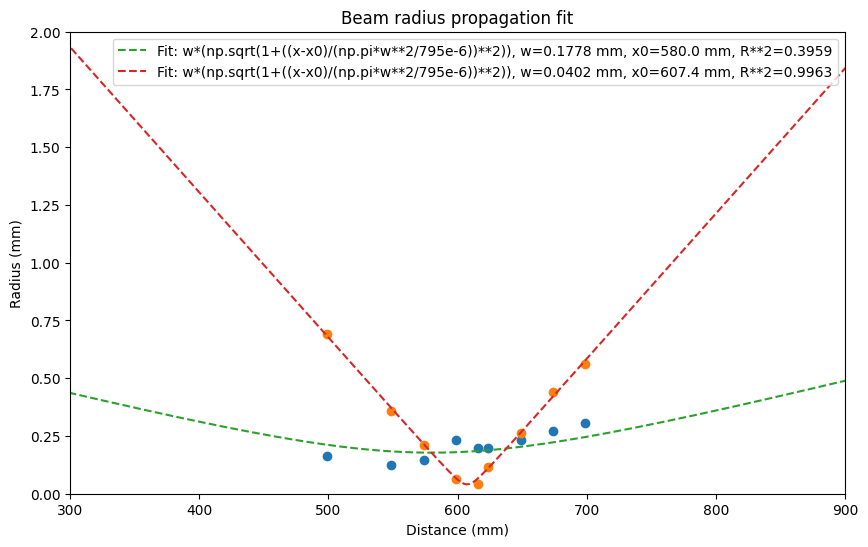

In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

x = 499, 548.5, 573.96, 599.143, 615.738, 623.75, 649.2, 673.82, 699
y = 0.324/2, 0.253/2, 0.2902/2, 0.466/2, 0.3938/2, 0.394/2, 0.468/2, 0.5418/2, 0.6156/2
x_fit = np.linspace(2*min(x), -2*max(x), 1000)

def exponential_decay_fixed(x, a, b):
    return np.exp(-a*x)+b

def beam_prop(x,w):
    #w=0.889
    x0=1434
    #xr=np.pi*w**2/795e-6
    return w*(np.sqrt(1+((x-x0)/(np.pi*w**2/795e-6))**2))

def beam_propl(x,w,x0):
    #w=0.889
    #xr=np.pi*w**2/795e-6
    return w*(np.sqrt(1+((x-x0)/(np.pi*w**2/795e-6))**2))

def a_exponential(x, a, b):
    return b*a**x

def linear_fit(x, a, b):
    return 1-a*x + b

params, covs = curve_fit(beam_propl, x, y, bounds=([0, 580], [.5, 600]),maxfev=10000)
print("params: ", params)
print("covariance: ", covs)

resids = y-beam_propl(x, *params)
res_sumsq = np.sum(resids**2)
totres_sumsq = np.sum((y-np.mean(y))**2)
r_sq = 1-res_sumsq/totres_sumsq

print("r squared: ", r_sq)

a = params[0]
b = params[1]

xx = 499, 548.5, 573.96, 599.143, 615.738, 623.75, 649.2, 673.82, 699
yy = 1.38125/2, 0.7195/2, 0.42148/2, 0.1307/2, 0.08759/2, 0.2337/2, 0.5263/2, 0.8845/2, 1.12603/2 

paramsl, covsl = curve_fit(beam_propl, xx, yy, bounds=([0, 550], [.05, 650]), maxfev=10000)
print("params: ", paramsl)
print("covariance: ", covsl)

residsl = yy-beam_propl(xx, *paramsl)
res_sumsql = np.sum(residsl**2)
totres_sumsql = np.sum((yy-np.mean(yy))**2)
r_sql = 1-res_sumsql/totres_sumsql

print("r squared: ", r_sql)

al = paramsl[0]
bl = paramsl[1]

plt.figure(figsize=(10, 6))
plt.title('Beam radius propagation fit')
plt.xlabel('Distance (mm)')
plt.ylabel('Radius (mm)')
plt.xlim(300,900)
plt.ylim(0,2)
plt.plot(x, y, 'o')
plt.plot(xx, yy, 'o')
plt.plot(x_fit, beam_propl(x_fit, a, b), '--', label =f'Fit: w*(np.sqrt(1+((x-x0)/(np.pi*w**2/795e-6))**2)), w={a:.4f} mm, x0={b:.1f} mm, R**2={r_sq:.4f}')
plt.plot(x_fit, beam_propl(x_fit, al, bl), '--', label =f'Fit: w*(np.sqrt(1+((x-x0)/(np.pi*w**2/795e-6))**2)), w={al:.4f} mm, x0={bl:.1f} mm, R**2={r_sql:.4f}')
plt.legend(loc="upper right")